# Decision Tree

#### Q.1 Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

## Company dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data=pd.read_csv("C:\\Users\Admin\Downloads\\Company_Data.csv")
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


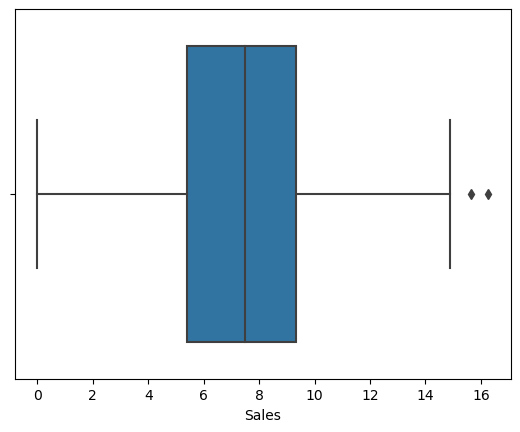

In [7]:
sns.boxplot(x=company_data['Sales'])
import warnings
warnings.filterwarnings('ignore')

In [8]:
num_columns = company_data.select_dtypes(exclude='object').columns.tolist()

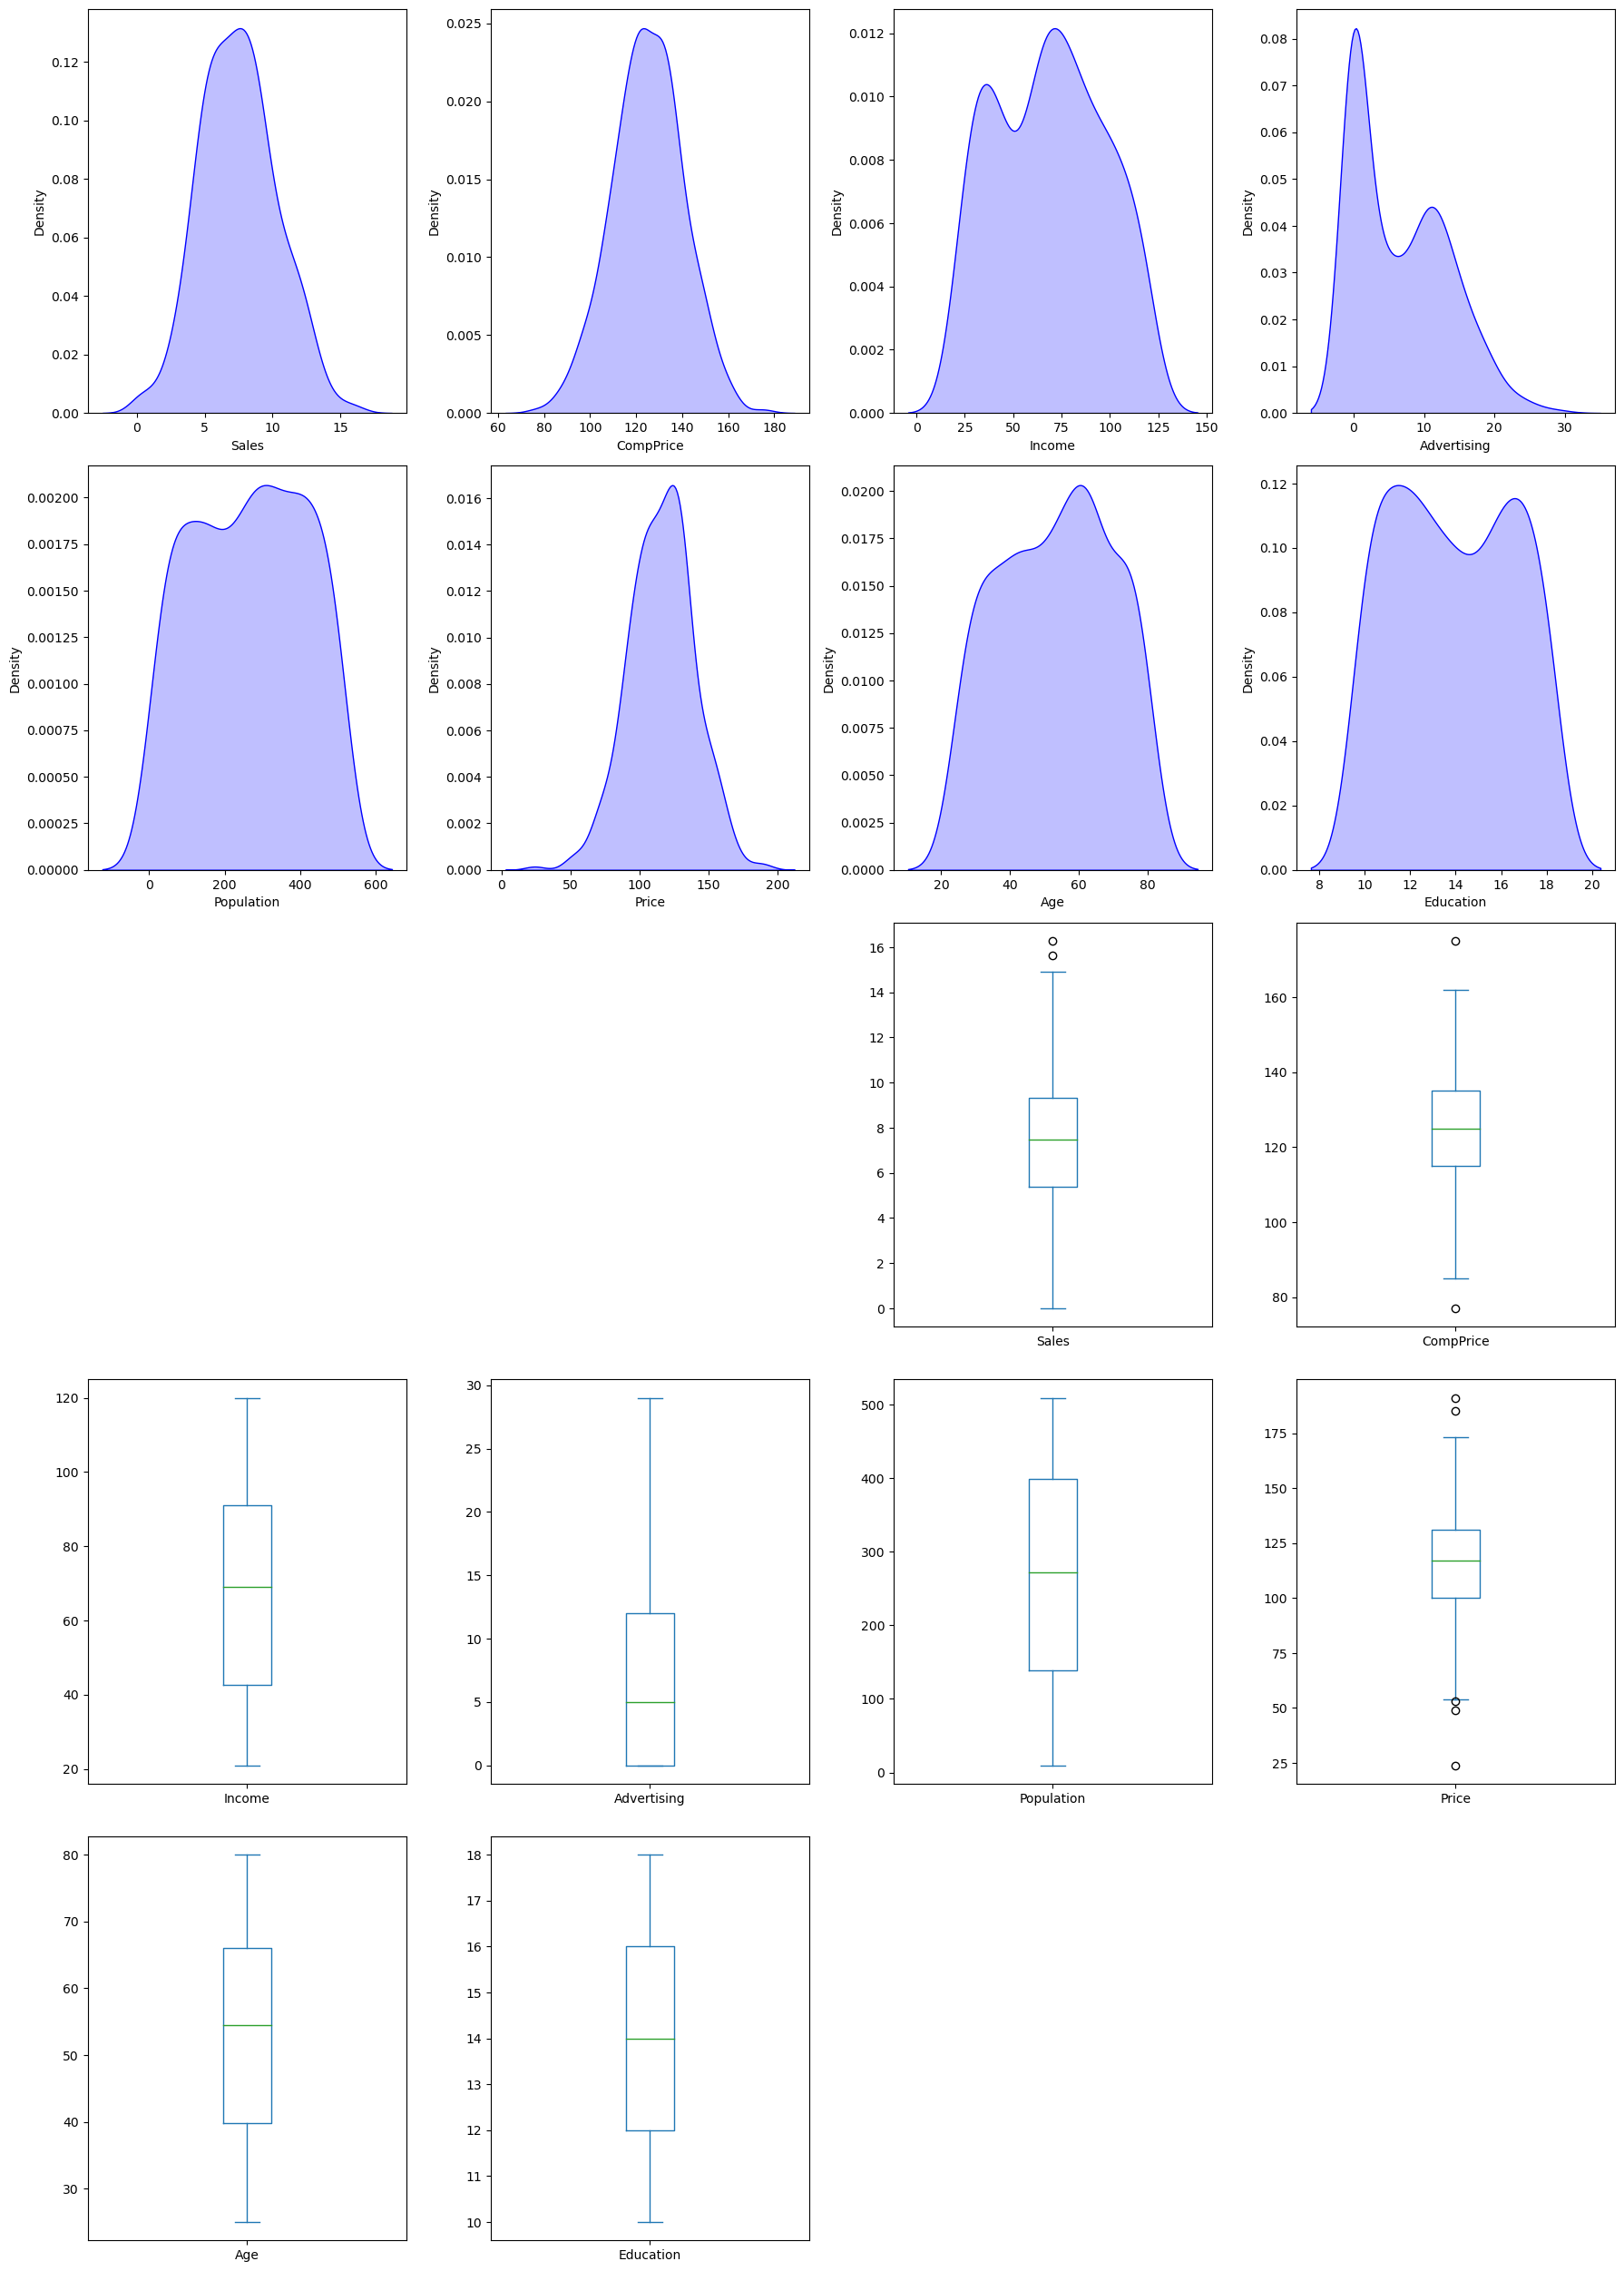

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [9]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company_data[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    company_data[col].plot.box()
plt.tight_layout()
plt.show()
num_data = company_data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

As the skewness is less than 2 wecan proceed for further analysis

In [10]:
#Converting target variable in categorical variable
company_data["Sales"] = np.where(company_data['Sales']>8,'yes','no')

In [11]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [13]:
LE=LabelEncoder()
company_data['ShelveLoc']=LE.fit_transform(company_data['ShelveLoc'])

In [14]:
company_data.Sales.replace(('yes','no'),(1,0),inplace=True)
company_data.Urban.replace(('Yes','No'),(1,0),inplace=True)
company_data.US.replace(('Yes','No'),(1,0),inplace=True)
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [15]:
company_data.dtypes

Sales          int64
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int64
US             int64
dtype: object

## Model Building

In [16]:
x=pd.concat([company_data.iloc[:,1:]])
y=company_data.iloc[:,0]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.20)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320,)
(80,)


## Model Training

In [19]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [20]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Model Testing

In [21]:
y_train_pred=dt_model.predict(x_train)
y_train_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,

In [22]:
y_test_pred=dt_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

## Model Evaluation

Training Accuracy

In [23]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       195
           1       0.70      0.77      0.73       125

    accuracy                           0.78       320
   macro avg       0.77      0.78      0.77       320
weighted avg       0.79      0.78      0.78       320



In [24]:
print(confusion_matrix(y_train,y_train_pred))

[[154  41]
 [ 29  96]]


0.7788717948717948


Text(0, 0.5, 'True Positive Rate')

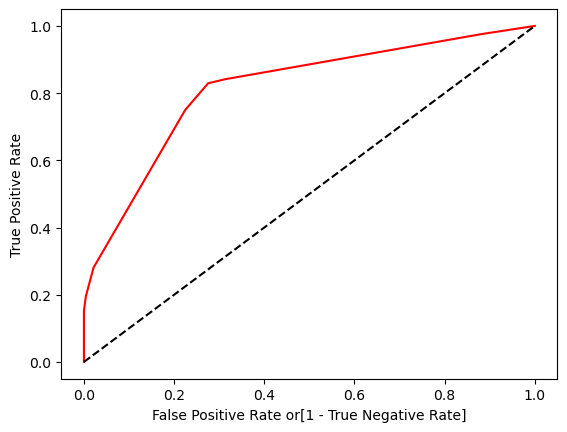

In [25]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])
auc = roc_auc_score(y_train,y_train_pred)
print(auc)
plt.plot(fpr,tpr, color='red', label='dt model ( area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Test Accuracy

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        41
           1       0.69      0.69      0.69        39

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



In [27]:
print(confusion_matrix(y_test,y_test_pred))

[[29 12]
 [12 27]]


0.699812382739212


Text(0, 0.5, 'True Positive Rate')

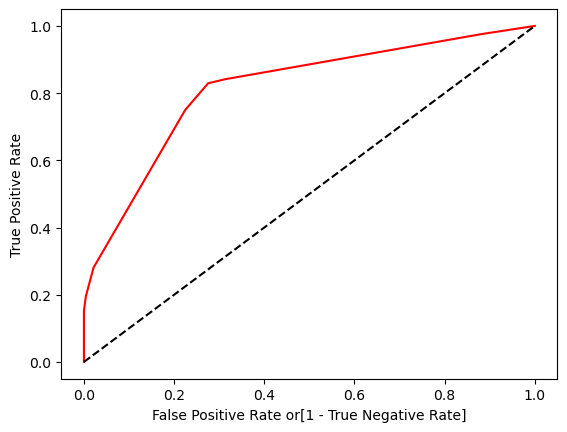

In [28]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])
auc = roc_auc_score(y_test,y_test_pred)
print(auc)
plt.plot(fpr,tpr, color='red', label='dt model ( area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

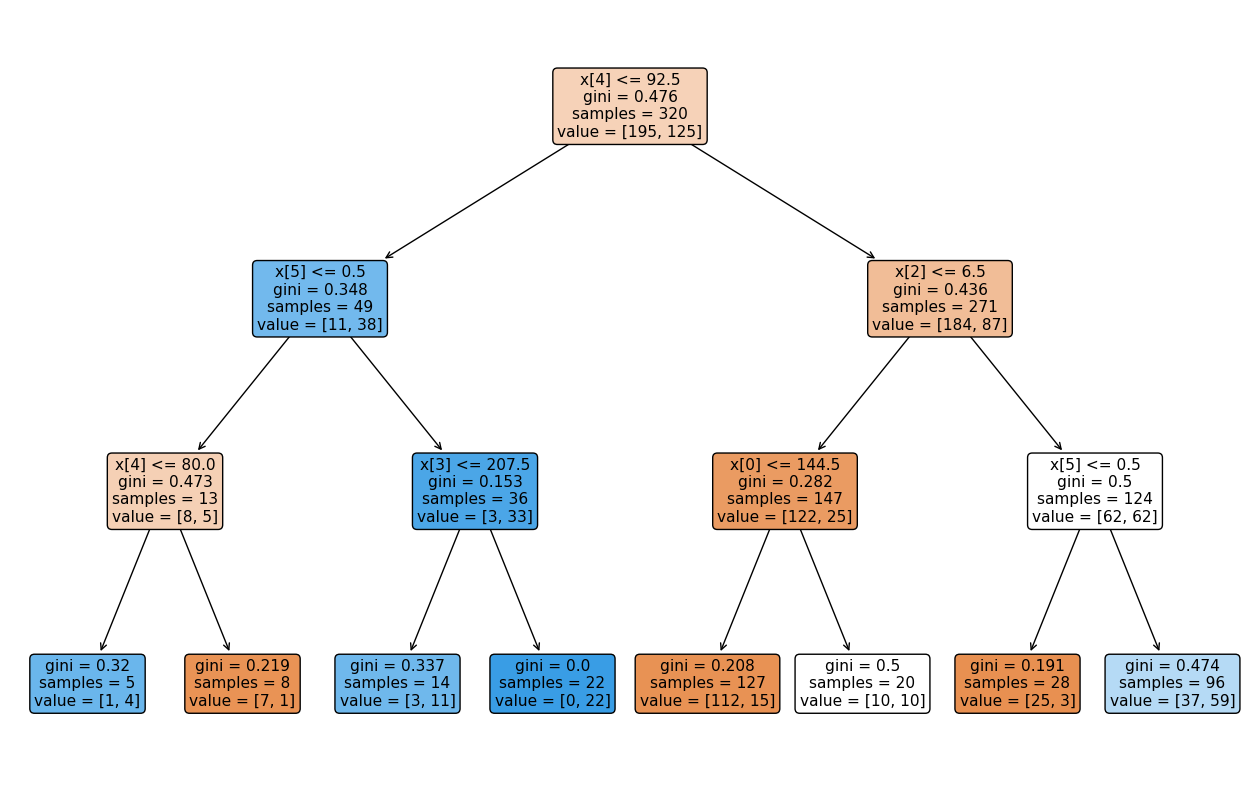

In [29]:
# Apply the decision tree classifier model to the data woth a maximum tree depth of 3
model = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model, rounded = True,filled = True)
# Displays the tree plot figure.
plt.show()

## Fraud check dataset

Use decision trees to prepare a model on fraud data treating those who have taxable_income <30000 as "Risky" and others are "Good"

Data Description:

Undergrad : person is under graduated or not Marital.Status :marital status of a person. Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government. Work Experience : Work experience of an individual person. Urban : Whether that person belongs to urban area or not 

In [30]:
fdata=pd.read_csv("C:\\Users\Admin\Downloads\\Fraud_check.csv")

In [31]:
fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Initial Investigation

In [32]:
fdata.shape

(600, 6)

In [33]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [34]:
fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

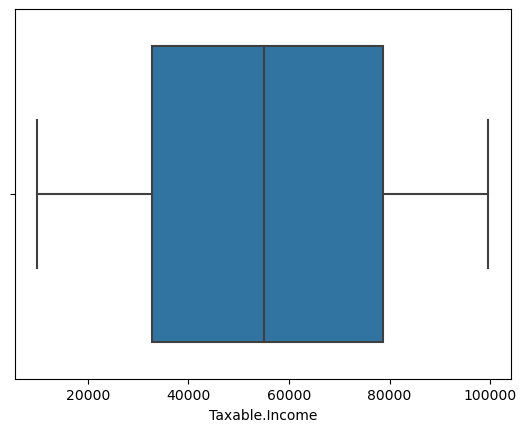

In [35]:
ax = sns.boxplot(x=fdata['Taxable.Income'])

There is no outliers in the data

In [36]:
num_columns = fdata.select_dtypes(exclude='object').columns.tolist()

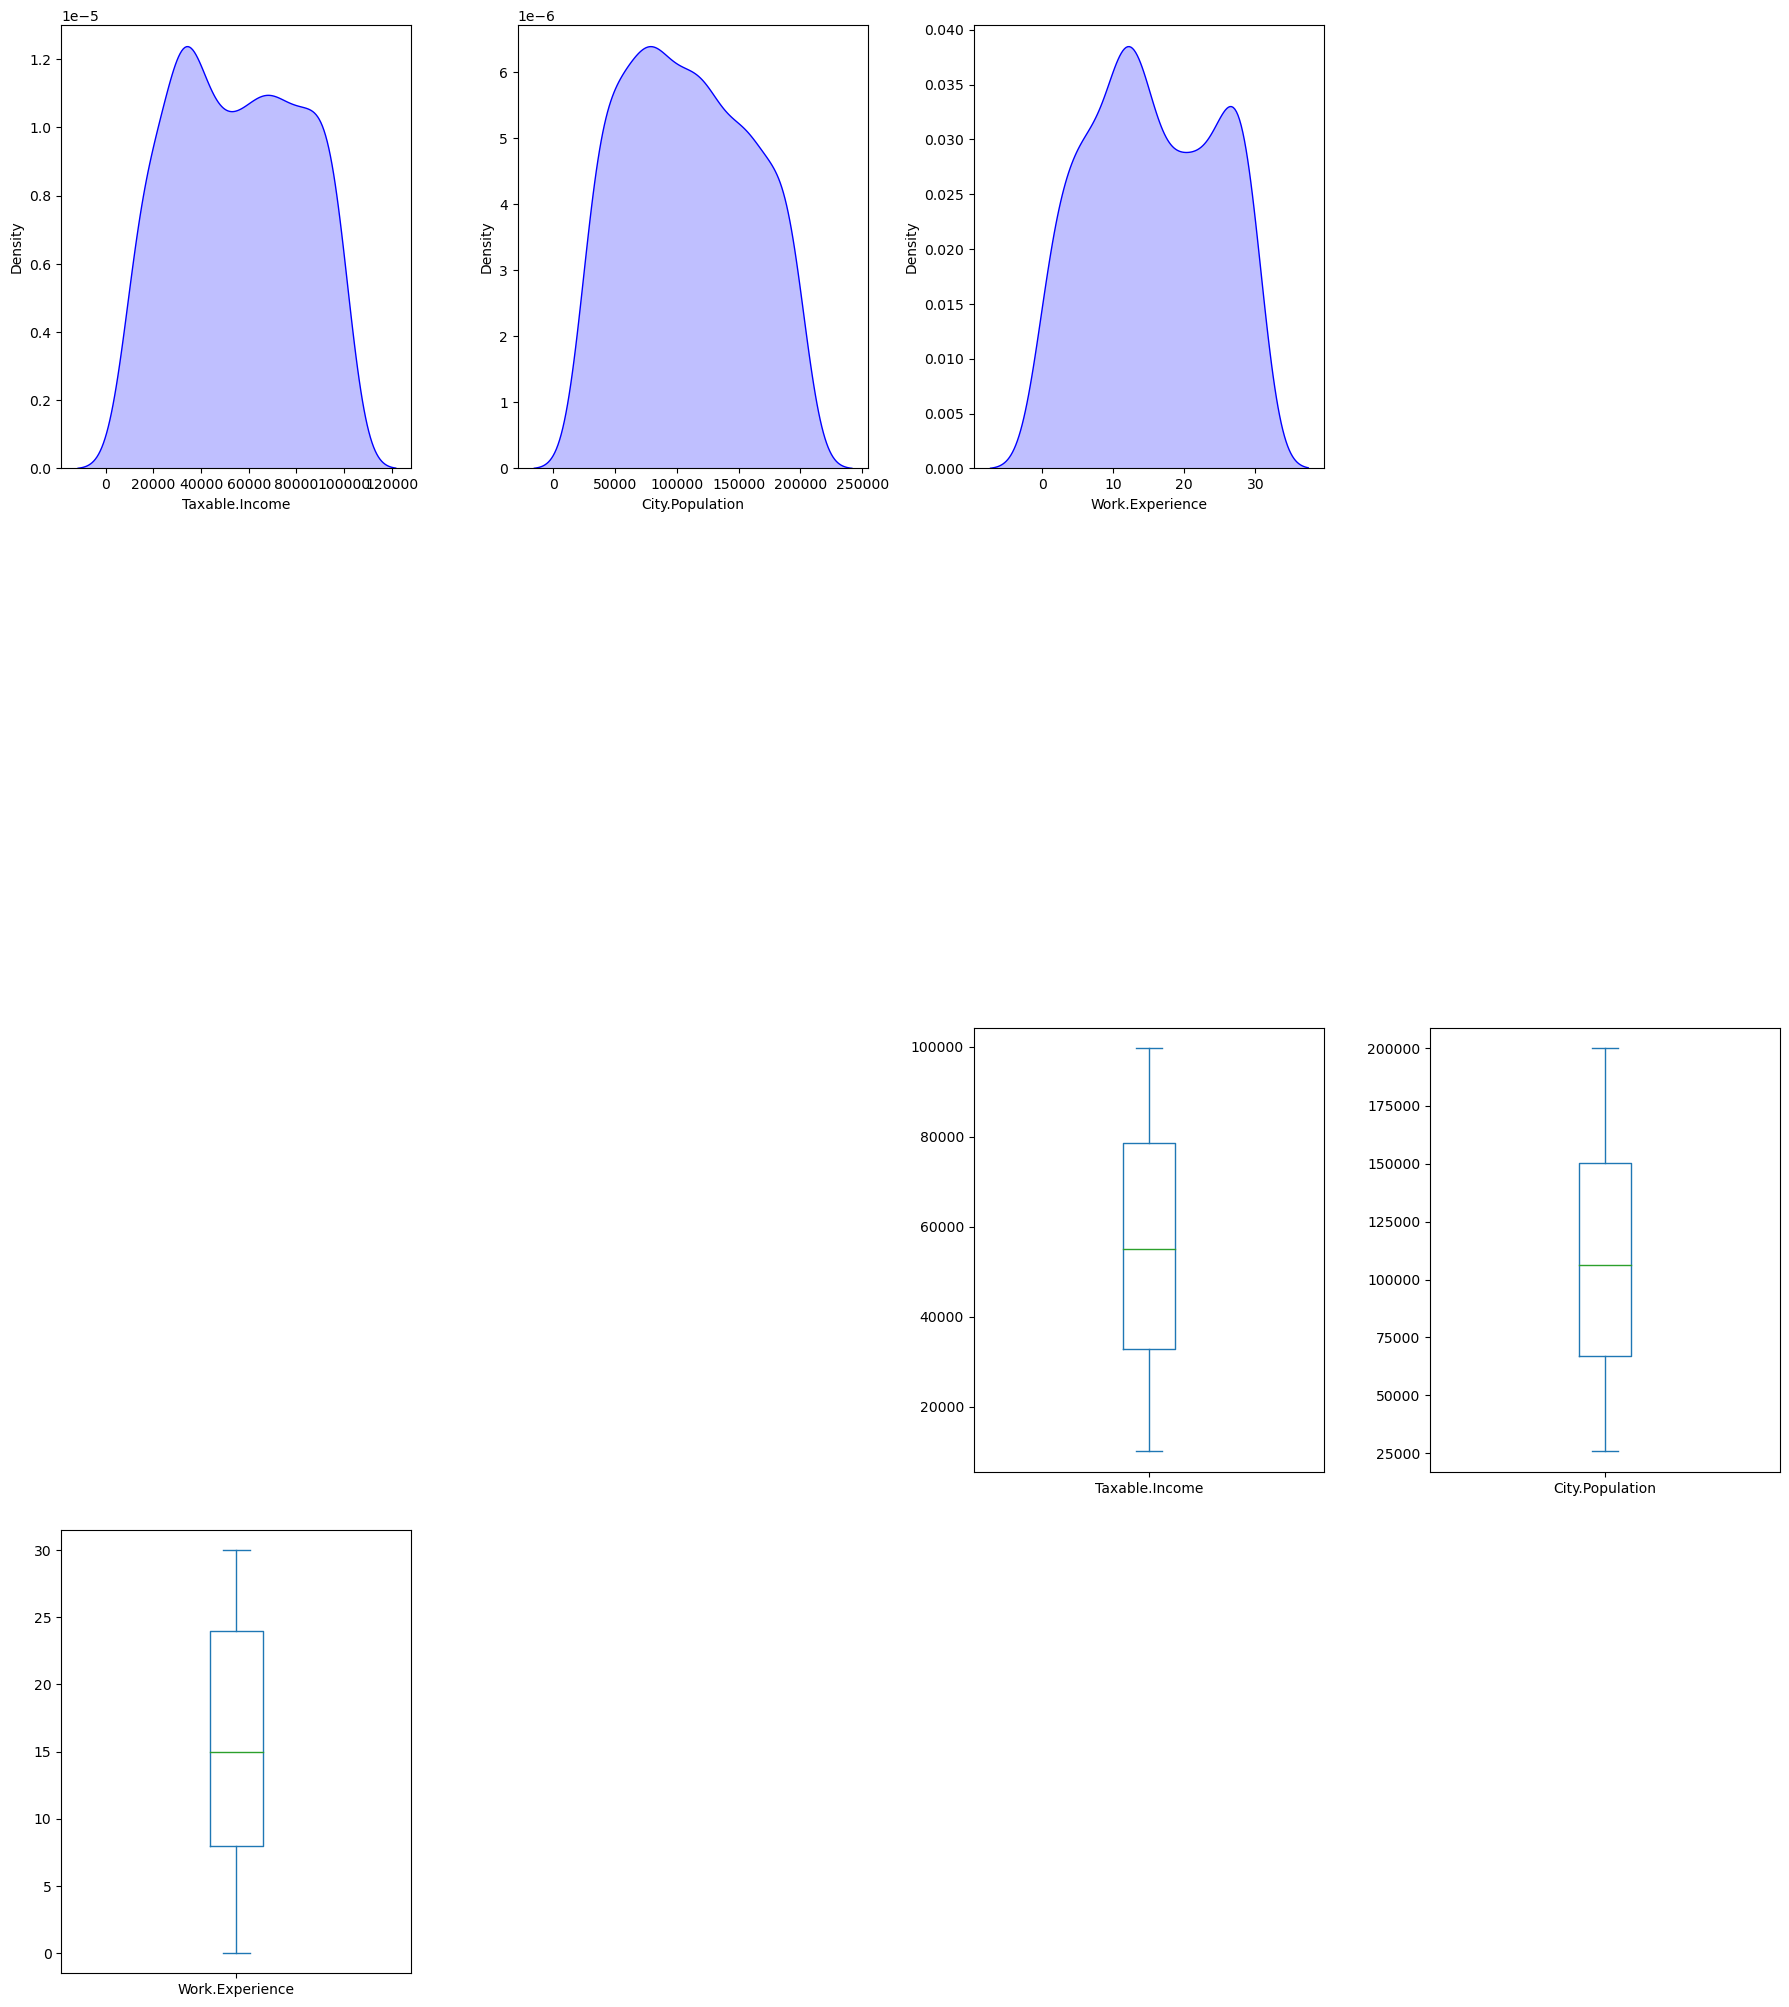

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [37]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fdata[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    fdata[col].plot.box()
plt.tight_layout()
plt.show()
num_data = fdata[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

As the skewness is less than 2 we can proceed for further analysis

### Data Preprocessing

In [38]:
for i in range (len(fdata['Taxable.Income'])):
    if fdata['Taxable.Income'][i] <= 30000:
        fdata['Taxable.Income'][i] = 'risky'
    else:
        fdata['Taxable.Income'][i] = 'good'

In [39]:
fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [40]:
print(fdata.columns)

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


In [41]:
fdata1=pd.get_dummies(fdata,columns=['Marital.Status'])
# Convert True/False to integers (1 for True, 0 for False)
fdata1[['Marital.Status_Divorced', 'Marital.Status_Married', 'Marital.Status_Single']] = fdata1[['Marital.Status_Divorced', 'Marital.Status_Married', 'Marital.Status_Single']].astype(int)
fdata1

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,good,50047,10,YES,0,0,1
1,YES,good,134075,18,YES,1,0,0
2,NO,good,160205,30,YES,0,1,0
3,YES,good,193264,15,YES,0,0,1
4,NO,good,27533,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,YES,good,39492,7,YES,1,0,0
596,YES,good,55369,2,YES,1,0,0
597,NO,good,154058,0,YES,1,0,0
598,YES,good,180083,17,NO,0,1,0


In [42]:
# Convert categorical values to numerical values
fdata1['Undergrad'].replace(('YES', 'NO'), (1, 0), inplace=True)
fdata1['Taxable.Income'].replace(('good', 'risky'), (1, 0), inplace=True)
fdata1['Urban'].replace(('YES', 'NO'), (1, 0), inplace=True)

# Display the first 50 rows of the modified DataFrame
fdata1.head(50)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,1,50047,10,1,0,0,1
1,1,1,134075,18,1,1,0,0
2,0,1,160205,30,1,0,1,0
3,1,1,193264,15,1,0,0,1
4,0,1,27533,28,0,0,1,0
5,0,1,116382,0,0,1,0,0
6,0,1,80890,8,1,1,0,0
7,1,1,131253,3,1,0,0,1
8,0,1,102481,12,1,0,0,1
9,1,1,155482,4,1,1,0,0


In [43]:
fdata.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Model Building

In [44]:
X=pd.concat([fdata1.iloc[:,0:1],fdata1.iloc[:,2:]],axis=1)
X

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0
596,1,55369,2,1,1,0,0
597,0,154058,0,1,1,0,0
598,1,180083,17,0,0,1,0


In [45]:
Y=fdata1.iloc[:,1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123, test_size=0.20)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 7)
(120, 7)
(480,)
(120,)


### Model Training

In [48]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [49]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### Model Testing

In [50]:
Y_train_pred=model.predict(X_train)
Y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Model Evaluation

Training data

In [51]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        98
           1       0.81      1.00      0.89       382

    accuracy                           0.81       480
   macro avg       0.90      0.53      0.50       480
weighted avg       0.85      0.81      0.73       480



In [52]:
print(confusion_matrix(Y_train,Y_train_pred))

[[  6  92]
 [  0 382]]


0.5306122448979591


Text(0, 0.5, 'True Positive Rate')

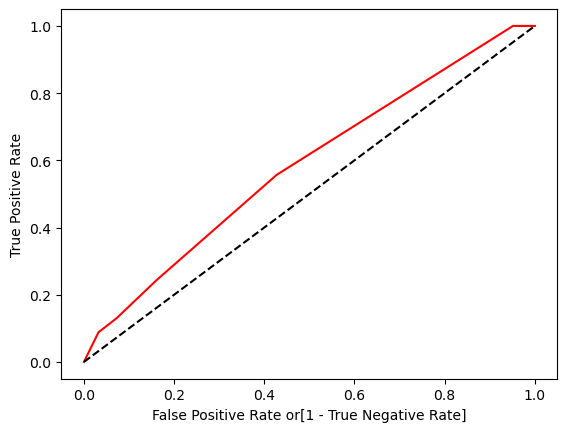

In [53]:
fpr, tpr, thresholds = roc_curve(Y,model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr,tpr, color='red', label=' model ( area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Testing Data

In [54]:
Y_test_pred = model.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [56]:
print(confusion_matrix(Y_test,Y_test_pred))

[[ 0 26]
 [ 0 94]]


0.5


Text(0, 0.5, 'True Positive Rate')

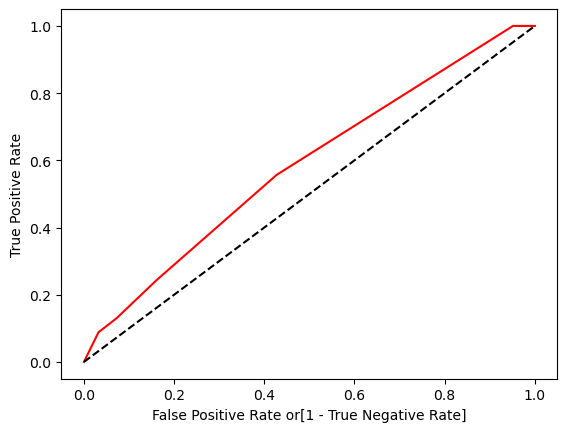

In [57]:
fpr, tpr, thresholds = roc_curve(Y,model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr,tpr, color='red', label=' model ( area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

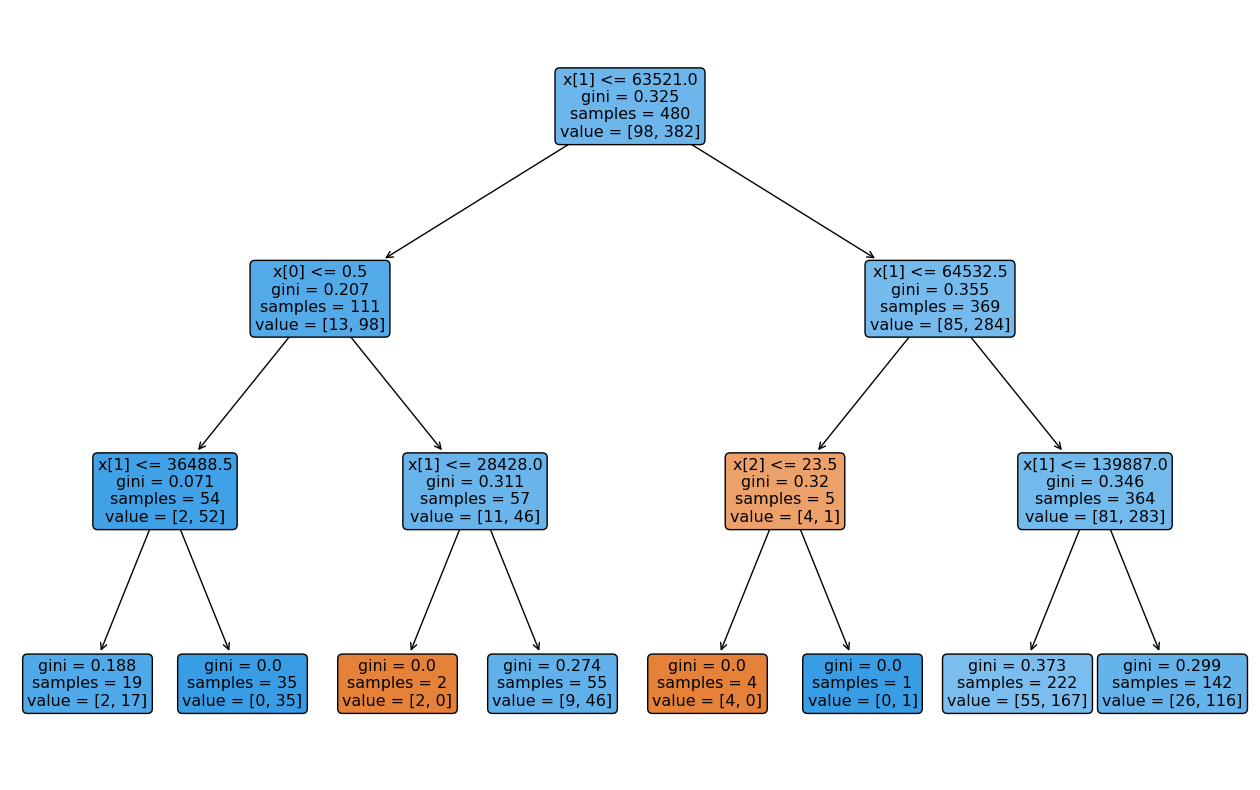

In [58]:
# Apply the decision tree classifier model to the data woth a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True)
# Displays the tree plot figure.
plt.show()

## Training accuracy = 81%
## Testing accuracy = 78%